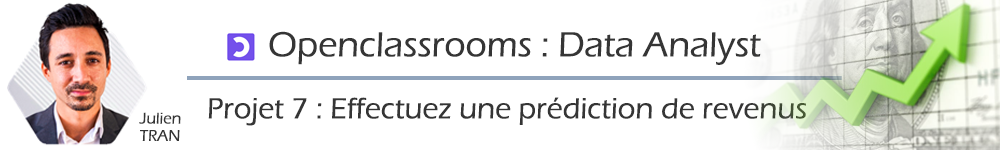

### Mission 1 : Résumez les données utilisées

- année(s) des données utilisées ;
- nombre de pays présents ;
- population couverte par l'analyse (en termes de pourcentage de la population mondiale).

Les données de la World Income Distribution présentent pour chaque pays les quantiles de la distribution des revenus de leur population respective.

<font color='royalblue'> De quel type de quantiles s'agit-il (quartiles, déciles, etc.) ? </font>  

<font color='royalblue'> Échantillonner une population en utilisant des quantiles est-il selon vous une bonne méthode ? Pourquoi ? </font>

### Sommaire // Mission 1 🔮

* [1.Importation des librairies et parametres df](#1)
* [2.Importation des fichiers CSV](#2)
* [3.Nettoyage des différentes tables](#3)
    * [3.1.data_projet7](#3.1)
        * [3.1.1.Valeurs manquantes, nulles et NA](#3.1.1)
            * [3.1.1.1.Corrections des valeurs manquantes, nulles et NA](#3.1.1.1)
        * [3.1.2.Doublons](#3.1.2)
        * [3.1.3.Outliers, valeurs abberantes et atypiques](#3.1.3)
    * [3.2.Population et indice de gini](#3.2)
        * [3.2.1.Valeurs manquantes, nulles et NA](#3.2.1)
            * [3.2.1.1.Corrections des valeurs manquantes, nulles et NA](#3.2.1.1)
        * [3.2.2.Doublons](#3.2.2)
        * [3.2.3.Outliers, valeurs abberantes et atypiques](#3.2.3)
        * [3.2.4.Ajout d'une colonne ISO3](#3.2.4)
        * [3.2.5.Jointure de Population et data_projet7](#3.2.5)
    * [3.3.Proportion de la population étudiée vs 2008](#3.3)

## 1.Importation des librairies et parametres df <a class="anchor" id="1"></a>

In [1]:
#j'importe les librairies qui vont me servir plus tard
import numpy as np
import pandas as pd

#Je definis le nombre de lignes max affichées sur None
pd.set_option("max_rows", None) 
pd.set_option("display.precision",7)

## 2.Importation des fichiers CSV <a class="anchor" id="2"></a>

In [2]:
#Je charge tous les fichiers csv
data_projet7 = pd.read_csv("C:/Users/33643/Desktop/P7/CSV/data-projet7.csv",decimal=",")
Population = pd.read_csv("C:/Users/33643/Desktop/P7/CSV/WIID_31MAY2021_0.csv",decimal=".")
country_code_en = pd.read_csv("C:/Users/33643/Desktop/P7/CSV/country-code-en.csv",decimal=",")

#J'affiche une phrase si l'import est reussi
print("Fichiers chargés avec succes!")

Fichiers chargés avec succes!


C:\Users\33643\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 3.Nettoyage des différentes tables <a class="anchor" id="3"></a>

In [3]:
country_code_en.head()

,Pays,ISO2,ISO3,ISOON
0,Afghanistan,AF,AFG,4
1,Aland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16


In [4]:
len(country_code_en['ISO3'].unique())

247

## 3.1.data_projet7 <a class="anchor" id="3.1"></a>

In [5]:
data_projet7.head(3)

,country,year_survey,quantile,nb_quantiles,income,gdpppp
0,ALB,2008,1,100,728.89795,7297.0
1,ALB,2008,2,100,916.66235,7297.0
2,ALB,2008,3,100,1010.91600,7297.0


In [6]:
data_projet7.shape

(11599, 6)

In [7]:
data_projet7.dtypes

country          object
year_survey       int64
quantile          int64
nb_quantiles      int64
income          float64
gdpppp          float64
dtype: object

In [8]:
print(data_projet7.isnull().any())
print(data_projet7.isnull().sum())

country         False
year_survey     False
quantile        False
nb_quantiles    False
income          False
gdpppp           True
dtype: bool
country           0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
dtype: int64


In [9]:
# Restriction sur year_survey avec valeurs uniques
data_projet7.groupby(by=['year_survey']).nunique()

,country,quantile,nb_quantiles,income,gdpppp
year_survey,,,,,
2004,1,100,1,100,1
2006,5,100,1,500,5
2007,15,100,1,1500,15
2008,76,100,1,7598,75
2009,12,100,1,1200,11
2010,6,100,1,600,6
2011,1,100,1,100,1


### Je remarque que les pays sont répartis selon plusieurs années, et majoritairement pour l'année 2008. J'utiliserai donc la population de l'année 2008 pour calculer mon pourcentage de population représenté.

### <font color='red'> Les quantiles utilisés dans la table data_projet7 sont des centiles </font>

#### <font color='red'> Outre la spécification de la position d'un ensemble de données, les quantiles sont utiles à d'autres égards. Supposons que nous ayons un échantillon aléatoire simple d'une population et que la distribution de la population soit inconnue. Pour aider à déterminer si un modèle, comme une distribution normale ou une distribution de Weibull convient bien à la population à partir de laquelle nous avons échantillonné, nous pouvons examiner les quantiles de nos données et du modèle.

#### <font color='red'> En faisant correspondre les quantiles de nos échantillons de données aux quantiles d'une distribution de probabilité particulière, le résultat est une collection de données appariées. Nous représentons ces données dans un nuage de points, connu sous le nom de graphique quantile-quantile ou graphique q-q. Si le nuage de points résultant est à peu près linéaire, alors le modèle est un bon ajustement pour nos données. </font>

### <font color='red'> Les années couverte par l'étude sont 2004, 2006, 2007, 2008, 2009, 2010 et 2011 </font>

In [10]:
len(data_projet7['country'].unique())

116

### <font color='red'> Le nombre de pays couverts par l'étude est de 116 </font>

In [11]:
# J'ajoute le nom des pays à la table en faisant une jointure avec la table country_code_en
data_projet7 = pd.merge(data_projet7, country_code_en, left_on= 'country', right_on= 'ISO3', how= 'left')
data_projet7 = data_projet7.drop(columns =['ISO2','ISOON','ISO3'])
data_projet7 = data_projet7.rename(columns ={'country':'ISO3'})

data_projet7.head(3)

,ISO3,year_survey,quantile,nb_quantiles,income,gdpppp,Pays
0,ALB,2008,1,100,728.89795,7297.0,Albania
1,ALB,2008,2,100,916.66235,7297.0,Albania
2,ALB,2008,3,100,1010.91600,7297.0,Albania


## 3.1.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.1.1"></a>

In [12]:
print(data_projet7.isnull().any())
print(data_projet7.isnull().sum())

ISO3            False
year_survey     False
quantile        False
nb_quantiles    False
income          False
gdpppp           True
Pays             True
dtype: bool
ISO3              0
year_survey       0
quantile          0
nb_quantiles      0
income            0
gdpppp          200
Pays            100
dtype: int64


In [13]:
# Je vérifie que certaine variables ne présentent de données
data_projet7_uniq = data_projet7.groupby(by='ISO3').nunique()
data_projet7_uniq.head(3)

,year_survey,quantile,nb_quantiles,income,gdpppp,Pays
ISO3,,,,,,
ALB,1,100,1,100,1,1
ARG,1,100,1,100,1,1
ARM,1,100,1,100,1,1


In [14]:
# Vérification pour la variable bdpppp
data_projet7_uniq.loc[data_projet7_uniq['gdpppp'] < 1]

,year_survey,quantile,nb_quantiles,income,gdpppp,Pays
ISO3,,,,,,
PSE,1,100,1,100,0,1
XKX,1,100,1,100,0,0


In [15]:
# Vérification pour la variable income
data_projet7_uniq.loc[data_projet7_uniq['income'] < 100]

,year_survey,quantile,nb_quantiles,income,gdpppp,Pays
ISO3,,,,,,
LTU,1,99,1,99,1,1


### Les pays PSE et XKX ne présentent pas de gdpppp, XKX ne présente pas de nom de pays

In [16]:
# Vérification pour la variable quantile
data_projet7_uniq.loc[data_projet7_uniq['quantile'] < 100]

,year_survey,quantile,nb_quantiles,income,gdpppp,Pays
ISO3,,,,,,
LTU,1,99,1,99,1,1


### Le pays LTU ne présente pas 100 quantiles mais 99, il manque une ligne

## 3.1.1.1.Corrections des valeurs manquantes, nulles et NA <a class="anchor" id="3.1.1.1"></a>

In [17]:
# J'affecte le nom du pays et du GDP PPP pour XKX
data_projet7.loc[data_projet7['ISO3'] == 'XKX', 'Pays'] = 'Kosovo'
data_projet7.loc[data_projet7['ISO3'] == 'XKX', 'gdpppp'] = 7530.632

data_projet7.loc[data_projet7['ISO3'] == 'XKX'].head(1)

,ISO3,year_survey,quantile,nb_quantiles,income,gdpppp,Pays
5800,XKX,2008,1,100,437.8937,7530.632,Kosovo


In [18]:
# J'affecte le GDP PPP pour PSE
data_projet7.loc[data_projet7['ISO3'] == 'PSE', 'gdpppp'] = 3612.14

data_projet7.loc[data_projet7['ISO3'] == 'PSE'].head(1)

,ISO3,year_survey,quantile,nb_quantiles,income,gdpppp,Pays
11199,PSE,2009,1,100,195.2899,3612.14,Palestinian Territory Occupied


In [19]:
# Je recherche le quantile manquant pour LTU
data_projet7_LTU = data_projet7.loc[data_projet7['ISO3'] == 'LTU']
data_projet7_LTU = data_projet7_LTU.reset_index(drop=True)
data_projet7_LTU

,ISO3,year_survey,quantile,nb_quantiles,income,gdpppp,Pays
0,LTU,2008,1,100,566.3453,17571.0,Lithuania
1,LTU,2008,2,100,1147.0587,17571.0,Lithuania
2,LTU,2008,3,100,1490.8408,17571.0,Lithuania
3,LTU,2008,4,100,1746.5715,17571.0,Lithuania
4,LTU,2008,5,100,1842.9542,17571.0,Lithuania
5,LTU,2008,6,100,1925.8641,17571.0,Lithuania
6,LTU,2008,7,100,2048.3857,17571.0,Lithuania
7,LTU,2008,8,100,2173.7112,17571.0,Lithuania
8,LTU,2008,9,100,2302.0857,17571.0,Lithuania
9,LTU,2008,10,100,2361.6480,17571.0,Lithuania


### Je remarque qu'il manque le quantile 41

In [20]:
# Calcul du quantile manquant par la moyenne des quantiles autour
income_40 = 4868.4507
income_42 = 4895.8306
income_40_41 = (income_40+income_42)/2
income_40_41

4882.14065

In [21]:
# Création de la ligne manquante
LTU_41 = pd.DataFrame({'ISO3' :  ['LTU'],
                        'year_survey' : [2008],
                        'quantile' : [41],
                        'nb_quantiles' : [100],
                        'income' : [income_40_41],
                        'gdpppp'  :  [17571],
                        'Pays' : ['Lithuania']})
LTU_41

,ISO3,year_survey,quantile,nb_quantiles,income,gdpppp,Pays
0,LTU,2008,41,100,4882.14065,17571,Lithuania


In [22]:
# Concaténation avec la talbe data_projet7
data_projet7 = pd.concat([data_projet7, LTU_41], ignore_index=True)
data_projet7.tail(3)

,ISO3,year_survey,quantile,nb_quantiles,income,gdpppp,Pays
11597,COD,2008,99,100,1286.60290,303.19305,Congo Democratic Republic of the
11598,COD,2008,100,100,2243.12260,303.19305,Congo Democratic Republic of the
11599,LTU,2008,41,100,4882.14065,17571.00000,Lithuania


In [23]:
print(data_projet7.isnull().any())
print(data_projet7.isnull().sum())

ISO3            False
year_survey     False
quantile        False
nb_quantiles    False
income          False
gdpppp          False
Pays            False
dtype: bool
ISO3            0
year_survey     0
quantile        0
nb_quantiles    0
income          0
gdpppp          0
Pays            0
dtype: int64


## 3.1.2.Doublons <a class="anchor" id="3.1.2"></a>

In [24]:
print(data_projet7.duplicated().any())
print(data_projet7.duplicated().sum())

False
0


## 3.1.3.Outliers, valeurs abberantes et atypiques <a class="anchor" id="3.1.3"></a>

In [25]:
# Je regarde les extremes pour la colonne income et gdpppp
data_projet7.groupby('ISO3').mean().sort_values('gdpppp').tail()

,year_survey,quantile,nb_quantiles,income,gdpppp
ISO3,,,,,
IRL,2008.0,50.5,100.0,17710.7358380,39268.0
USA,2008.0,50.5,100.0,25503.5816610,43261.0
NOR,2008.0,50.5,100.0,22483.3750200,49070.0
LUX,2008.0,50.5,100.0,25217.5626810,73127.0
FJI,2008.0,50.5,100.0,2098.7308823,4300332.0


In [26]:
data_projet7.groupby('ISO3').mean().sort_values('income').tail()

,year_survey,quantile,nb_quantiles,income,gdpppp
ISO3,,,,,
NOR,2008.0,50.5,100.0,22483.3750200,49070.0
CAN,2008.0,50.5,100.0,23739.6405181,35895.0
LUX,2008.0,50.5,100.0,25217.5626810,73127.0
USA,2008.0,50.5,100.0,25503.5816610,43261.0
ISL,2008.0,50.5,100.0,26888.5115180,36527.0


### Le pays FJI affiche une moyenne gdpppp bien trop haute, la valeur est à modifier.

### RAS pour l'income

In [27]:
# j'affectate une valeur de GDP PPP plus cohérente
data_projet7.loc[data_projet7['ISO3'] == 'FJI', 'gdpppp'] = 7384.086
data_projet7.loc[data_projet7['ISO3'] == 'FJI'].head()

,ISO3,year_survey,quantile,nb_quantiles,income,gdpppp,Pays
3200,FJI,2008,1,100,308.17334,7384.086,Fiji
3201,FJI,2008,2,100,384.33230,7384.086,Fiji
3202,FJI,2008,3,100,436.59265,7384.086,Fiji
3203,FJI,2008,4,100,486.81436,7384.086,Fiji
3204,FJI,2008,5,100,520.19720,7384.086,Fiji


In [28]:
data_projet7 = data_projet7.rename(columns ={'year_survey':'Year'})
data_projet7 = data_projet7.rename(columns ={'Pays':'Country'})

In [29]:
len(data_projet7['Country'].unique())

116

## 3.2.Population <a class="anchor" id="3.2"></a>

*World Income Inequality Database - WIID - 31 May 2021*

In [30]:
Population.head(3)

,id,country,c3,c2,year,gini,ge0,ge1,ge2,a025,...,population,revision,quality,quality_score,source,source_detailed,source_comments,survey,link,wiidcompanion
0,1,Afghanistan,AFG,AF,2008,29.0,NaN,NaN,NaN,NaN,...,"27,722,282",New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...,Yes
1,2,Afghanistan,AFG,AF,2012,33.0,NaN,NaN,NaN,NaN,...,"31,161,378",New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://cso-of-afghanistan.shinyapps.io/ALCS_D...,Yes
2,3,Afghanistan,AFG,AF,2017,31.0,NaN,NaN,NaN,NaN,...,"36,296,108",New 2019,High,12,National statistical authority,European Union and the Central Statistics Orga...,NaN,Living Conditions Survey (LCS),https://eeas.europa.eu/regions/asia/44072/resu...,Yes


In [31]:
Population.shape

(20675, 67)

In [32]:
# Je supprime les virugules de la colonne population pour poivoir pleinement utiliser celle-ci
Population['population'] = Population['population'].str.replace(',', '')

In [33]:
Population['population'].dtypes

dtype('O')

In [34]:
Population['population'] = Population['population'].apply(pd.to_numeric,errors = 'coerce')
Population['population'].dtypes

dtype('float64')

In [35]:
#Je nettoie ma table Indice_gini
Population = Population.drop(columns =['id','ge0','ge1','ge2','a025','a050','a075','a1','palma','ratio_top20bottom20','bottom40','q1','q2','q3','q4','q5','d1','d2','d3','d4','d5','d6','d7','d8','d9','d10'])
Population = Population.drop(columns =['bottom5','top5','resource','resource_detailed','scale','scale_detailed','sharing_unit','reference_unit','areacovr','areacovr_detailed','popcovr','popcovr_detailed','region_un','region_un_sub','region_wb','eu','oecd','incomegroup','mean','median','currency','reference_period','exchangerate','mean_usd','median_usd','revision'])
Population = Population.drop(columns =['quality','quality_score','source','source_detailed','source_comments','survey','link','wiidcompanion'])
Population = Population.drop(columns =['c2','gdp'])
Population = Population.rename(columns ={'country':'Country'})
Population = Population.rename(columns ={'c3':'ISO3'})
Population = Population.rename(columns ={'year':'Year'})
Population = Population.rename(columns ={'population':'Population'})

Population.head(3)

,Country,ISO3,Year,gini,Population
0,Afghanistan,AFG,2008,29.0,27722282.0
1,Afghanistan,AFG,2012,33.0,31161378.0
2,Afghanistan,AFG,2017,31.0,36296108.0


In [36]:
Population['Year'].unique()

array([2008, 2012, 2017, 1996, 2002, 2005, 2014, 2015, 2016, 1988, 1995,
       2001, 2003, 2009, 2019, 1953, 1959, 1961, 1963, 1965, 1969, 1970,
       1972, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1985, 1986, 1987, 1989, 1990, 1991, 1992, 1993, 1994, 1997, 1998,
       1999, 2000, 2004, 2006, 2007, 2010, 2011, 2013, 2018, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1954, 1955,
       1956, 1957, 1958, 1960, 1962, 1964, 1966, 1967, 1968, 1971, 1973,
       1984, 1939, 1936, 1890, 1900, 1910, 1920, 1930, 1940, 1914, 1921,
       1927, 1938, 2020, 1935, 1867], dtype=int64)

In [37]:
Population['Year'].dtypes

dtype('int64')

In [38]:
# Restriction des années ciblées précedemment (2004, 2006, 2007, 2008, 2009, 2010 et 2011)

Population = Population.loc[Population['Year'].isin([2004,2006,2007,2008,2009,2010,2011])]
Population.head()

,Country,ISO3,Year,gini,Population
0,Afghanistan,AFG,2008,29.00,27722282.0
6,Albania,ALB,2008,29.98,3002683.0
21,Angola,AGO,2009,55.00,22514276.0
22,Angola,AGO,2009,43.00,22514276.0
23,Angola,AGO,2009,50.00,22514276.0


## 3.2.1.Valeurs manquantes, nulles et NA <a class="anchor" id="3.2.1"></a>

In [39]:
print(Population.isnull().any())
print(Population.isnull().sum())

Country       False
ISO3          False
Year          False
gini           True
Population    False
dtype: bool
Country        0
ISO3           0
Year           0
gini          27
Population     0
dtype: int64


In [40]:
Population[Population['gini'].isnull()]

,Country,ISO3,Year,gini,Population
257,Armenia,ARM,2007,NaN,2932615.0
260,Armenia,ARM,2008,NaN,2907615.0
263,Armenia,ARM,2009,NaN,2888094.0
266,Armenia,ARM,2010,NaN,2877314.0
269,Armenia,ARM,2011,NaN,2876536.0
2045,Brunei,BRN,2011,NaN,393687.0
2296,Cambodia,KHM,2009,NaN,14093605.0
2298,Cambodia,KHM,2010,NaN,14312205.0
2300,Cambodia,KHM,2011,NaN,14541421.0
5975,Fiji,FJI,2009,NaN,853636.0


### J'ai repéré 27 NaN dans la colonne gini

In [41]:
# Je vérifie si certaine variables ne présentent aucune données
Population_uniq = Population.groupby(by='ISO3').nunique()
Population_uniq.head()

,Country,Year,gini,Population
ISO3,,,,
AFG,1,1,1,1
AGO,1,1,6,1
ALB,1,1,1,1
ARE,1,1,1,1
ARG,1,7,34,7


### RAS

In [42]:
# Vérification pour la variable gini
Population_uniq.loc[Population_uniq['gini'] < 1]

,Country,Year,gini,Population
ISO3,,,,
BRN,1,1,0,1
MMR,1,1,0,1


In [43]:
# Je regarde de quelle année il s'agit pour les pays ERI et NRU
Population.loc[(Population['ISO3'] == "BRN")] #2011
Population.loc[(Population['ISO3'] == "MMR")] #2010

,Country,ISO3,Year,gini,Population
12428,Myanmar,MMR,2010,NaN,50600828.0


## J'ai repéré 2 pays sans indice de gini, toutes années confondues

## 3.2.1.1.Corrections des valeurs manquantes, nulles et NA <a class="anchor" id="3.2.1.1"></a>

In [44]:
# Je remplace les NaN de la colonne gini pour leur affecter une nouvelle valeur
Population['gini'] = Population['gini'].fillna(0)

In [45]:
Population.loc[(Population['Country'] == "Armenia") & (Population['Year'] == 2007), 'gini'] = 31.2
Population.loc[(Population['Country'] == "Armenia") & (Population['Year'] == 2008), 'gini'] = 29.2
Population.loc[(Population['Country'] == "Armenia") & (Population['Year'] == 2009), 'gini'] = 28.0
Population.loc[(Population['Country'] == "Armenia") & (Population['Year'] == 2010), 'gini'] = 30.0
Population.loc[(Population['Country'] == "Armenia") & (Population['Year'] == 2011), 'gini'] = 29.4
Population.loc[(Population['Country'] == "Brunei") & (Population['Year'] == 2011), 'gini'] = 56.4 #1981
Population.loc[(Population['Country'] == "Cambodia") & (Population['Year'] == 2009), 'gini'] = 34.65
Population.loc[(Population['Country'] == "Cambodia") & (Population['Year'] == 2010), 'gini'] = 33.44
Population.loc[(Population['Country'] == "Cambodia") & (Population['Year'] == 2011), 'gini'] = 31.7
Population.loc[(Population['Country'] == "Fiji") & (Population['Year'] == 2009), 'gini'] = 40.38
Population.loc[(Population['Country'] == "Japan") & (Population['Year'] == 2004), 'gini'] = 44.3 #2003
Population.loc[(Population['Country'] == "Japan") & (Population['Year'] == 2009), 'gini'] = 39.46
Population.loc[(Population['Country'] == "Mauritius") & (Population['Year'] == 2007), 'gini'] = 35.65
Population.loc[(Population['Country'] == "Myanmar") & (Population['Year'] == 2010), 'gini'] = 38.07 #2015
Population.loc[(Population['Country'] == "Namibia") & (Population['Year'] == 2010), 'gini'] = 60.97
Population.loc[(Population['Country'] == "Oman") & (Population['Year'] == 2011), 'gini'] = 30.7
Population.loc[(Population['Country'] == "Pakistan") & (Population['Year'] == 2011), 'gini'] = 30.2
Population.loc[(Population['Country'] == "Singapore") & (Population['Year'] == 2008), 'gini'] = 47.4
Population.loc[(Population['Country'] == "Thailand") & (Population['Year'] == 2004), 'gini'] = 42.54
Population.loc[(Population['Country'] == "Thailand") & (Population['Year'] == 2006), 'gini'] = 41.82
Population.loc[(Population['Country'] == "Thailand") & (Population['Year'] == 2007), 'gini'] = 39.76
Population.loc[(Population['Country'] == "Thailand") & (Population['Year'] == 2009), 'gini'] = 39.05
Population.loc[(Population['Country'] == "Thailand") & (Population['Year'] == 2011), 'gini'] = 37.53
Population.loc[(Population['Country'] == "Vietnam") & (Population['Year'] == 2010), 'gini'] = 38.79

In [46]:
print(Population.isnull().any())
print(Population.isnull().sum())

Country       False
ISO3          False
Year          False
gini          False
Population    False
dtype: bool
Country       0
ISO3          0
Year          0
gini          0
Population    0
dtype: int64


## 3.2.2.Doublons <a class="anchor" id="3.2.2"></a>

In [47]:
print(Population.duplicated().any())
print(Population.duplicated().sum())

True
185


In [48]:
Population[Population.duplicated()]

,Country,ISO3,Year,gini,Population
25,Angola,AGO,2009,55.00,22514276.0
257,Armenia,ARM,2007,31.20,2932615.0
258,Armenia,ARM,2007,31.20,2932615.0
260,Armenia,ARM,2008,29.20,2907615.0
261,Armenia,ARM,2008,29.20,2907615.0
263,Armenia,ARM,2009,28.00,2888094.0
264,Armenia,ARM,2009,28.00,2888094.0
266,Armenia,ARM,2010,30.00,2877314.0
267,Armenia,ARM,2010,30.00,2877314.0
269,Armenia,ARM,2011,29.40,2876536.0


### J'ai detecté plusieurs lignes avec plusieurs valeurs d'indice de gini pour un meme pays, une meme année, selon plusieurs criteres, je décide garder que la premiere ligne de chaque pays.

In [49]:
Population.drop_duplicates(subset=['Country','ISO3','Year'],keep='first',inplace=True)

In [50]:
Population[Population.duplicated()]

,Country,ISO3,Year,gini,Population


In [51]:
print(Population.duplicated().any())
print(Population.duplicated().sum())

False
0


## 3.2.3.Outliers, valeurs abberantes et atypiques <a class="anchor" id="3.2.3"></a>

In [52]:
Population.head()

,Country,ISO3,Year,gini,Population
0,Afghanistan,AFG,2008,29.00,27722282.0
6,Albania,ALB,2008,29.98,3002683.0
21,Angola,AGO,2009,55.00,22514276.0
154,Argentina,ARG,2004,48.45,38491968.0
164,Argentina,ARG,2006,46.61,39289876.0


In [53]:
Population.loc[(Population['gini'] == 0)]

,Country,ISO3,Year,gini,Population


In [54]:
len(Population['Country'].unique())

173

In [55]:
# Je regarde les extremes pour la colonne gini
Population.groupby('ISO3').mean().sort_values('gini').tail()

,Year,gini,Population
ISO3,,,
CAF,2008.0,56.240,4273368.0
BRN,2011.0,56.400,393687.0
CIV,2008.0,56.560,19605568.0
NAM,2007.0,60.485,2013307.0
ZAF,2009.5,68.870,50869302.0


In [56]:
# Je regarde les extremes pour la colonne population
Population.groupby('ISO3').mean().sort_values('Population').tail()

,Year,gini,Population
ISO3,,,
BRA,2007.5000000,53.2533333,1.9095594e+08
IDN,2007.8571429,35.7142857,2.3514552e+08
USA,2007.8571429,41.0128571,3.0301588e+08
IND,2008.3333333,44.8333333,1.2047309e+09
CHN,2008.5000000,48.5000000,1.3574083e+09


### RAS

## 3.2.4.Jointure des tables Population et data_projet7 <a class="anchor" id="3.2.4"></a>

In [57]:
data_projet7 = pd.merge(data_projet7,Population, on= ['ISO3'], how= 'left')
data_projet7 = data_projet7.drop(columns =['Country_y','Year_y'])
data_projet7 = data_projet7.rename(columns ={'Country_x':'Country'})
data_projet7 = data_projet7.rename(columns ={'Year_x':'Year'})

data_projet7.head(3)

,ISO3,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population
0,ALB,2008,1,100,728.89795,7297.0,Albania,29.98,3002683.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,29.98,3002683.0
2,ALB,2008,3,100,1010.91600,7297.0,Albania,29.98,3002683.0


In [58]:
len(data_projet7['Country'].unique())

116

In [59]:
data_projet7.shape

(54800, 9)

In [60]:
data_projet7.dtypes

ISO3             object
Year              int64
quantile          int64
nb_quantiles      int64
income          float64
gdpppp          float64
Country          object
gini            float64
Population      float64
dtype: object

In [61]:
print(data_projet7.isnull().any())
print(data_projet7.isnull().sum())

ISO3            False
Year            False
quantile        False
nb_quantiles    False
income          False
gdpppp          False
Country         False
gini             True
Population       True
dtype: bool
ISO3              0
Year              0
quantile          0
nb_quantiles      0
income            0
gdpppp            0
Country           0
gini            100
Population      100
dtype: int64


In [62]:
data_projet7[data_projet7['gini'].isnull()]

,ISO3,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population
54693,COD,2008,1,100,29.364283,303.19305,Congo Democratic Republic of the,NaN,NaN
54694,COD,2008,2,100,40.948640,303.19305,Congo Democratic Republic of the,NaN,NaN
54695,COD,2008,3,100,47.906730,303.19305,Congo Democratic Republic of the,NaN,NaN
54696,COD,2008,4,100,53.693500,303.19305,Congo Democratic Republic of the,NaN,NaN
54697,COD,2008,5,100,58.434020,303.19305,Congo Democratic Republic of the,NaN,NaN
54698,COD,2008,6,100,63.338570,303.19305,Congo Democratic Republic of the,NaN,NaN
54699,COD,2008,7,100,67.120610,303.19305,Congo Democratic Republic of the,NaN,NaN
54700,COD,2008,8,100,70.029170,303.19305,Congo Democratic Republic of the,NaN,NaN
54701,COD,2008,9,100,73.610120,303.19305,Congo Democratic Republic of the,NaN,NaN
54702,COD,2008,10,100,76.695500,303.19305,Congo Democratic Republic of the,NaN,NaN


### Il manque l'indice de gini et la population pour le Congo > Imputation

In [63]:
# Je remplace les NaN de la colonne gini pour leur affecter une nouvelle valeur
data_projet7['gini'] = data_projet7['gini'].fillna(0)
data_projet7['Population'] = data_projet7['Population'].fillna(0)

# Imputation
data_projet7.loc[(data_projet7['ISO3'] == "COD") & (data_projet7['Year'] == '2008'), 'Population'] = 4011486
data_projet7.loc[(data_projet7['ISO3'] == "COD") & (data_projet7['Year'] == 2008), 'gini'] = 42.1

In [64]:
print(data_projet7.isnull().any())

ISO3            False
Year            False
quantile        False
nb_quantiles    False
income          False
gdpppp          False
Country         False
gini            False
Population      False
dtype: bool


In [65]:
print(data_projet7.duplicated().any())
print(data_projet7.duplicated().sum())

False
0


In [66]:
# Je vérifie si certaine variables ne présentent pas de données
data_projet7_uniqlast = data_projet7.groupby(by='ISO3').nunique()
data_projet7_uniqlast.head()

,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population
ISO3,,,,,,,,
ALB,1,100,1,100,1,1,1,1
ARG,1,100,1,100,1,1,7,7
ARM,1,100,1,100,1,1,7,7
AUT,1,100,1,100,1,1,7,7
AZE,1,100,1,100,1,1,1,1


In [67]:
# Vérification pour la variable gini
data_projet7_uniqlast.loc[data_projet7_uniqlast['gini'] < 1]

,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population
ISO3,,,,,,,,


In [68]:
# Je vérifie si certaine variables ne présentent pas de données
data_projet7_uniqlast2 = data_projet7.groupby(by='ISO3').nunique()
data_projet7_uniqlast2.loc[data_projet7_uniqlast2['gini'] < 1]

,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population
ISO3,,,,,,,,


In [69]:
# Vérification pour la variable Population
data_projet7_uniqlast.loc[data_projet7_uniqlast['Population'] < 1]

,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population
ISO3,,,,,,,,


In [70]:
# Vérification pour la variable income
data_projet7_uniqlast.loc[data_projet7_uniqlast['income'] < 1]

,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population
ISO3,,,,,,,,


In [71]:
# Vérification pour la variable gdpppp
data_projet7_uniqlast.loc[data_projet7_uniqlast['gdpppp'] < 1]

,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population
ISO3,,,,,,,,


In [72]:
data_projet7.head()

,ISO3,Year,quantile,nb_quantiles,income,gdpppp,Country,gini,Population
0,ALB,2008,1,100,728.89795,7297.0,Albania,29.98,3002683.0
1,ALB,2008,2,100,916.66235,7297.0,Albania,29.98,3002683.0
2,ALB,2008,3,100,1010.91600,7297.0,Albania,29.98,3002683.0
3,ALB,2008,4,100,1086.90780,7297.0,Albania,29.98,3002683.0
4,ALB,2008,5,100,1132.69970,7297.0,Albania,29.98,3002683.0


In [73]:
# J'exporte ma table en CSV pour la suite
#data_projet7.to_csv("C:/Users/33643/Desktop/P7/CSV2/data_projet7_clean.csv", index=False,encoding='utf-8-sig')

In [74]:
len(data_projet7['Country'].unique())

116

## 3.3.Proportion de la population etudiée vs 2008 <a class="anchor" id="3.3"></a>

In [75]:
Pop_tot_2008 = 6757000000
print('La population totale en 2008 est de', Pop_tot_2008, 'habitants')

La population totale en 2008 est de 6757000000 habitants


*source : https://donnees.banquemondiale.org/indicator/SP.POP.TOTL*

In [76]:
data_projet7_grouped = data_projet7.groupby('Country').mean()
data_projet7_pop = data_projet7_grouped['Population'].sum()
data_projet7_pop_ratio = (data_projet7_pop / Pop_tot_2008)*100

print("La population totale couverte par l'étude est de", data_projet7_pop, 'habitants')
print("Ce qui représente", data_projet7_pop_ratio, '% de la population mondiale')

La population totale couverte par l'étude est de 6171461397.004762 habitants
Ce qui représente 91.33434063940746 % de la population mondiale


### <font color='red'> La population couverte par l'étude est de 91,3% (par rapport à la population totale de 2008) </font> 